In [8]:
from torch_geometric.datasets import Planetoid
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
#import matplotlib.pyplot as plt
import pylab as plt
import pickle
import sys
import numpy as np

from GNM_Toolbox.data.dataloader import *

In [14]:
all_models0 = pickle_read('l2_analysis-cora.pkl')

In [3]:
def setBoxColors(bp, edge_color='red', face_color='red'):
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    plt.setp(bp["boxes"], facecolor=face_color)
    plt.setp(bp["fliers"], markeredgecolor=face_color)
    
def plot_data(all_models, colors, names):
    M = len(all_models)
    
    # Set up distances
    number_boxes = len(all_models[list(all_models.keys())[0]])
    minDist = -0.4
    maxDist = 0.4
    dist = [minDist + (maxDist-minDist)/(number_boxes-1) * i for i in range(number_boxes)]
    
    # Set up 
    fig = plt.figure(figsize=(18, 8))
    ax = plt.axes()
    minimum = 1
    maximum = 0
    for i, l in zip(range(1, M+1), all_models):
        for models, color, (dd, d) in zip(all_models[l], colors, enumerate(dist)):
            acc = list()
            for model in models:
                acc.append(model.detach().numpy()) 
            # Find min und max
            if minimum > min(acc):
                minimum = min(acc)
            if maximum < max(acc):
                maximum = max(acc)
            bp = plt.boxplot([acc], positions = [i+d], widths = 0.5 / len(dist), patch_artist=True)
            setBoxColors(bp, 'black', color)
        
    # Set x-axis labels
    seperation_lines = [i + 0.5 for i in range(1, M)]
    plt.vlines(seperation_lines, 0, 1, colors='grey', linestyles='dashed')
    ax.set_xticks(list(range(1, M+1)))
    #ax.set_yticks([0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05])
    lambdas = list(all_models.keys())
    lambdas.sort()
    ax.set_xticklabels([int(l * 100)/100 for l in lambdas])
    plt.ylim(minimum - 0.01, maximum + 0.01)
    plt.xlim(0.4, M + 0.6)
    
    # draw temporary red and blue lines and use them to create a legend
    helps = list()
    for color in colors:
        h, = plt.plot([1, 1], color=color)
        helps.append(h)
    ax.legend(helps, names, prop={'size': 16}) #plot.legend(loc=2, prop={'size': 6})
    ax.grid(True, axis='y')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'Mean Squared Error')
    for h in helps:
        h.set_visible(False)

In [11]:
def plot_data2(all_models, colors, names):
    M = len(all_models)
    
    # Set up distances
    number_boxes = len(all_models[list(all_models.keys())[0]])
    minDist = -0.4
    maxDist = 0.4
    dist = [minDist + (maxDist-minDist)/(number_boxes-1) * i for i in range(number_boxes)]
    
    # Set up 
    fig = plt.figure(figsize=(18, 8))
    ax = plt.axes()
    minimum = 1
    maximum = 0
    for i, l in zip(range(1, M+1), all_models):
        for models, color, (dd, d) in zip(all_models[l], colors, enumerate(dist)):
            acc = list()
            for model in models:
                acc.append(model) 
            # Find min und max
            if minimum > min(acc):
                minimum = min(acc)
            if maximum < max(acc):
                maximum = max(acc)
            alternative_boxplot(acc, i+d, 0.4/len(dist), color)
        
    # Set x-axis labels
    seperation_lines = [i + 0.5 for i in range(1, M)]
    plt.vlines(seperation_lines, 0, 1, colors='grey', linestyles='dashed')
    ax.set_xticks([1 + d for d in dist])
    #ax.set_yticks([0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05])
    lambdas = list(all_models.keys())
    lambdas.sort()
    ax.set_xticklabels(names)
    plt.ylim(minimum - 0.01, maximum + 0.01)
    plt.xlim(0.4, M + 0.6)
    
    # draw temporary red and blue lines and use them to create a legend
    helps = list()
    for color in colors:
        h, = plt.plot([1, 1], color=color)
        helps.append(h)
    ax.grid(True, axis='y')
    ax.set_xlabel(r'p')
    ax.set_ylabel(r'Genauigkeit')
    for h in helps:
        h.set_visible(False)

def alternative_boxplot(data, x_position, x_width, color):
    # data: list of floats
    # x_postition: float
    # x_width: float
    N = len(data)
    mean = np.mean(data)
    print('{}:{}'.format(sum([1 for d in data if d > mean]), sum([1 for d in data if d < mean])))
    noise = np.random.rand(N)
    x_positions = x_position - x_width/2. + noise * x_width
    plt.plot(x_positions, np.array(data), 'x', color = color)

68:92
89:71
81:79
87:73
72:88
69:91


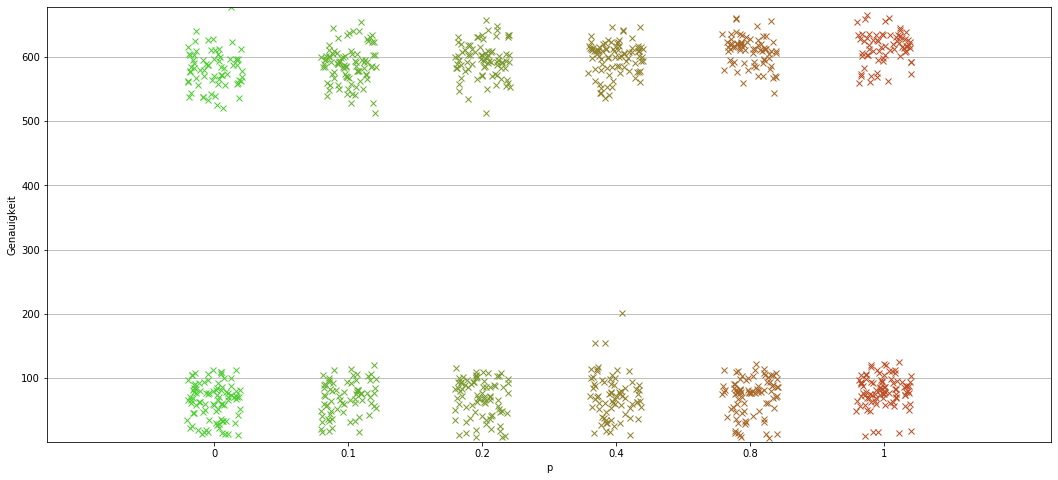

In [15]:
# 0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02
plot_data2(all_models0, 
          colors = [(0.3 + i * 0.0875, 0.8 - i * 0.1, 0.2 - i * 0.01) for i in range(8)], 
          names = [0, 0.1, 0.2, 0.4, 0.8, 1])



74:86
75:85
77:83
72:88
71:89


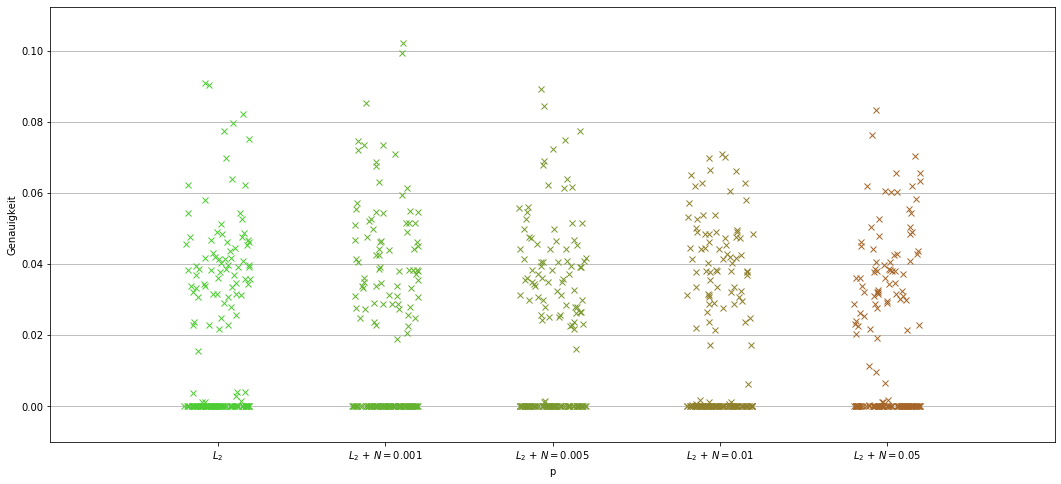

In [7]:
# 0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02
plot_data2(all_models2, 
          colors = [(0.3 + i * 0.0875, 0.8 - i * 0.1, 0.2 - i * 0.01) for i in range(8)], 
          names = [r'$L_2$', r'$L_2$ + $N = {0.001}$', r'$L_2$ + $N = {0.005}$', r'$L_2$ + $N = {0.01}$', r'$L_2$ + $N = {0.05}$', r'$L_2$ + $N = {0.1}$', r'$L_2$ + $N = {0.2}$', r'$L_2$ + $N = {0.5}$'])




In [ ]:
# 0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02
plot_data2(all_models1, 
          colors = [(0.3 + i * 0.0875, 0.8 - i * 0.1, 0.2 - i * 0.01) for i in range(8)], 
          names = [r'$L_2$', r'$L_2$ + $N = {0.001}$', r'$L_2$ + $N = {0.005}$', r'$L_2$ + $N = {0.01}$', r'$L_2$ + $N = {0.05}$', r'$L_2$ + $N = {0.1}$', r'$L_2$ + $N = {0.2}$', r'$L_2$ + $N = {0.5}$'])


In [ ]:
# 0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02
plot_data(all_models1, 
          colors = [(0.3 + i * 0.0875, 0.8 - i * 0.1, 0.2 - i * 0.01) for i in range(8)], 
          names = [r'$L_2$', r'$L_2$ + $N = {0.001}$', r'$L_2$ + $N = {0.005}$', r'$L_2$ + $N = {0.01}$', r'$L_2$ + $N = {0.05}$', r'$L_2$ + $N = {0.1}$', r'$L_2$ + $N = {0.2}$', r'$L_2$ + $N = {0.5}$'])




In [ ]:
a = [i.detach().numpy() for i in all_models1[1][0]]
b = [i.detach().numpy() for i in all_models1[1][1]]
c = [i.detach().numpy() for i in all_models1[1][2]]
d = [i.detach().numpy() for i in all_models1[1][3]]
plt.hist(a, bins=40, alpha=0.6, edgecolor='black', label='a')
plt.hist(b, bins=40, alpha=0.6, edgecolor='black', label='b')
plt.hist(c, bins=40, alpha=0.6, edgecolor='black', label='c')
plt.hist(d, bins=40, alpha=0.6, edgecolor='black', label='d')
plt.legend()

In [ ]:
[0, 1, 2] < 4

In [ ]:
a = torch.tensor([[0.1, 0.9],
              [0.9, 0.1],
              [0.9, 0.1],
              [0.1, 0.9]])
torch.argmax(a, dim=1)

In [ ]:
def plot_iterations(all_models, colors, names, dist = [-0.15, 0.15]):
    M = len(all_models)
    
    # Set up 
    fig = plt.figure(figsize=(18, 8))
    ax = plt.axes()
    minimum = 1
    maximum = 0
    for i, l in zip(range(1, M+1), all_models):
        models = all_models[l][2]
        color = colors[1]
        d = 0
        acc = list()
        for model in models:
            acc.append(model[2])

        # Find min und max
        if minimum > min(acc):
            minimum = min(acc)
        if maximum < max(acc):
            maximum = max(acc)

        bp = plt.boxplot([acc], positions = [i+d], widths = 0.25, patch_artist=True)
        setBoxColors(bp, 'black', color)
        
    # Set x-axis labels
    seperation_lines = [i + 0.5 for i in range(1, M)]
    plt.vlines(seperation_lines, 0, 1, colors='grey', linestyles='dashed')
    ax.set_xticks(list(range(1, M+1)))
    lambdas = list(all_models.keys())
    lambdas.sort()
    ax.set_xticklabels([int(l * 100)/100 for l in lambdas])
    plt.ylim(minimum - 0.01, maximum + 2)
    plt.xlim(0.6, M + .4)
    
    # draw temporary red and blue lines and use them to create a legend
    helps = list()
    for color in colors:
        h, = plt.plot([1, 1], color=color)
        helps.append(h)
    ax.legend(helps, names)
    for h in helps:
        h.set_visible(False)

In [ ]:
plot_iterations(all_models, ('red', 'blue'), ('SM5', 'SM'))